# Agent-Based Modeling Analysis

This notebook analyzes job completion times, node utilization, and costs using a structured approach.

In [33]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# Load artists and nodes data
artists = pd.read_csv('../data/artists.csv')
nodes = pd.read_csv('../data/nodes.csv')

## Step 1: Generate Jobs Data
We generate a dataset containing job details with consistent `Artist_ID` and `Node_ID`.

In [36]:
jobs = pd.DataFrame({
    'Job_ID': range(1, 101),  # 100 jobs
    'Artist_ID': np.random.choice(artists['Artist_ID'], 100),  # Use Artist_ID from artists
    'Node_ID': np.random.choice(nodes['Node_ID'], 100),       # Use Node_ID from nodes
    'Completion_Time': np.random.randint(1, 100, 100),        # Random completion times
    'Cost': np.random.randint(10, 100, 100)                   # Random costs
})

# Save the updated jobs data
jobs.to_csv('../data/jobs.csv', index=False)

In [37]:
# Display the first few rows of each dataset
print("Jobs Data:")
print(jobs.head())

print("\nArtists Data:")
print(artists.head())

print("\nNodes Data:")
print(nodes.head())

Jobs Data:
   Job_ID  Artist_ID  Node_ID  Completion_Time  Cost
0       1         12       20               31    24
1       2         69       11               20    62
2       3         88        9               96    48
3       4          5       16               57    21
4       5         36       13               27    17

Artists Data:
   Artist_ID Project_Size Urgency
0          1       medium     low
1          2        small  medium
2          3       medium    high
3          4       medium  medium
4          5        large     low

Nodes Data:
   Node_ID Pricing_Tier  Bandwidth  Availability
0        1          low         38      0.803276
1        2         high         48      0.695646
2        3       medium         34      0.636832
3        4          low         34      0.883114
4        5          low         66      0.703337


## Step 2: Merge Datasets
We combine job, artist, and node data for a comprehensive analysis.

In [38]:
# Merge jobs with artists
merged_data = pd.merge(jobs, artists, on='Artist_ID')
merged_data = pd.merge(merged_data, nodes, on='Node_ID')

In [39]:
# Display the merged data
print("Merged Data:")
print(merged_data.head())

Merged Data:
   Job_ID  Artist_ID  Node_ID  Completion_Time  Cost Project_Size Urgency  \
0       1         12       20               31    24       medium  medium   
1       2         69       11               20    62        small  medium   
2       3         88        9               96    48       medium     low   
3       4          5       16               57    21        large     low   
4       5         36       13               27    17       medium     low   

  Pricing_Tier  Bandwidth  Availability  
0          low         27      0.705537  
1         high         80      0.574265  
2         high         54      0.775637  
3          low         84      0.669242  
4          low         46      0.562766  


## Step 3: Visualize Job Completion Times

### 1. Box Plot - Completion Time by Project Size and Pricing Tier
This plot helps understand variations in completion time.

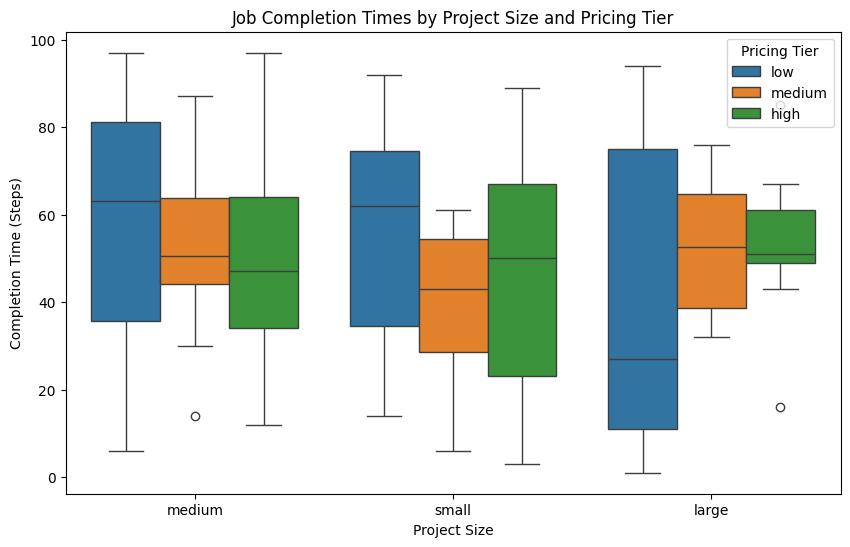

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Project_Size', y='Completion_Time', hue='Pricing_Tier', data=merged_data)
plt.title('Job Completion Times by Project Size and Pricing Tier')
plt.xlabel('Project Size')
plt.ylabel('Completion Time (Steps)')
plt.legend(title='Pricing Tier')
plt.show()

## Step 4: Analyze Node Utilization
### 1. Count Jobs per Node
Determine how many jobs each node has processed.

In [29]:
node_utilization = jobs['Node_ID'].value_counts().reset_index()
node_utilization.columns = ['Node_ID', 'Jobs_Processed']

# Display node utilization
print(node_utilization.head())

   Node_ID  Jobs_Processed
0       12              11
1       10               9
2       14               9
3        9               8
4        4               7


### 2. Bar Plot - Node Utilization
Visual representation of node workload.

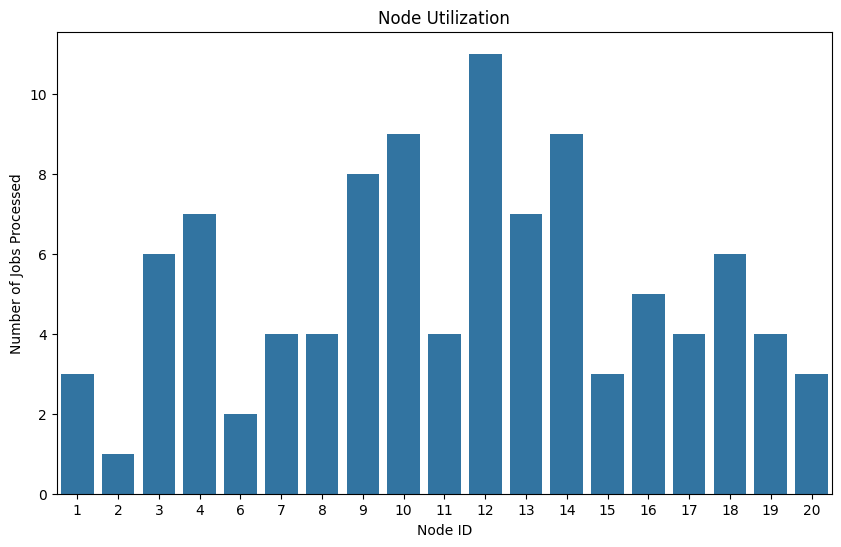

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Node_ID', y='Jobs_Processed', data=node_utilization)
plt.title('Node Utilization')
plt.xlabel('Node ID')
plt.ylabel('Number of Jobs Processed')
plt.show()

## Step 5: Analyze Job Costs
### 1. Box Plot - Cost by Project Size and Pricing Tier
Understanding cost variations across different projects.

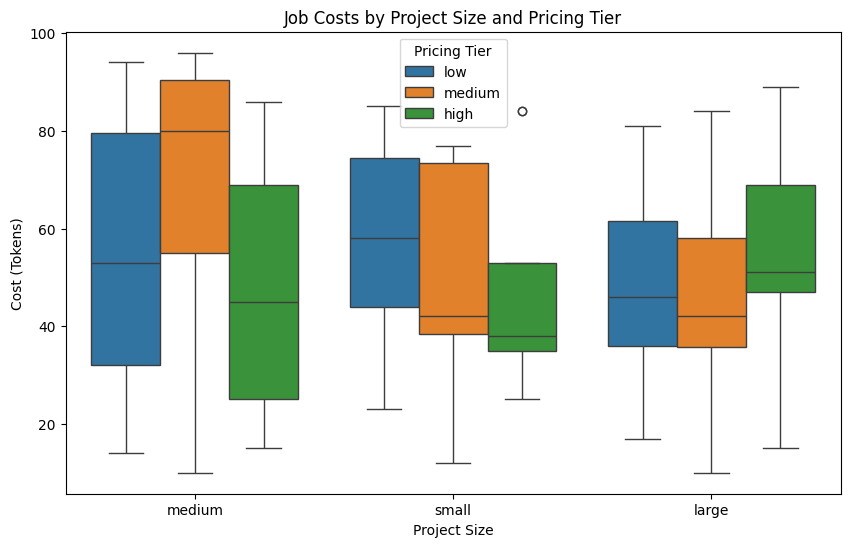

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Project_Size', y='Cost', hue='Pricing_Tier', data=merged_data)
plt.title('Job Costs by Project Size and Pricing Tier')
plt.xlabel('Project Size')
plt.ylabel('Cost (Tokens)')
plt.legend(title='Pricing Tier')
plt.show()

## Step 6: Insights and Summary
### 1. Job Completion Times
* Unexpected Performance Patterns: The medium pricing tier consistently delivers the fastest completion times, while the high-tier performance is inconsistent.
* Low-Tier Variability: Low-tier processing takes the longest, with completion times varying widely, especially for large projects.
* Key Issue: Pricing tiers do not reliably correlate with performance, suggesting inefficiencies in how resources are allocated.

### 2. Node Utilization
* Workload Imbalance: Some nodes, like Node #12, process over 10 jobs, while others, such as Node #2, handle only 1.
* Performance Bottlenecks: This uneven workload distribution likely causes delays and inefficient use of computing resources.
* Optimization Opportunity: Redistributing tasks more evenly across nodes could enhance system efficiency and reduce job completion times.

### 3. Cost Patterns
* Unexpected Cost Distributions: Medium-sized projects sometimes cost more than large projects, particularly in the medium pricing tier.
* Pricing Inefficiencies: The high-tier pricing model often provides better cost efficiency for small projects compared to lower tiers.
* Key Issue: Pricing structures may not accurately reflect actual resource consumption, presenting an opportunity for pricing model adjustments.

### Conclusion
These findings highlight critical areas for optimization, including workload rebalancing, pricing tier adjustments, and targeted performance improvements. A deeper analysis with specific recommendations is outlined in the full report.